# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint
import json
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [2]:
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [3]:
'''Query Citipy with random lat-long values until we collect our sample, and append weather
data via Open Weather Map API call.''' 

# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0


## Generate Cities List

In [4]:
# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
         # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.at[record, "city_name"] = city_name
            cities_df.at[record, "country_code"] = country_code
            cities_df.at[record, "rand_lat"] = rand_lat
            cities_df.at[record, "rand_lng"] = rand_lng
            cities_df.at[record, "Latitude"] = latitude
            cities_df.at[record, "Longitude"] = longitude
            cities_df.at[record, "Temp (F)"] = temp
            cities_df.at[record, "Humidity (%)"] = humidity
            cities_df.at[record, "Cloudiness (%)"] = cloud
            cities_df.at[record, "Wind Speed (mph)"] = wind

            record += 1
        else:
            pass
    else:
        pass
    
print(
    "------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 1
City: Ketchikan. http://api.openweathermap.org/data/2.5/weather?q=ketchikan,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 2
City: Ocos. http://api.openweathermap.org/data/2.5/weather?q=ocos,gt&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 3
City: Kieta. http://api.openweathermap.org/data/2.5/weather?q=kieta,pg&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 4
City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 5
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 

City: Sylacauga. http://api.openweathermap.org/data/2.5/weather?q=sylacauga,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 46
City: Pangnirtung. http://api.openweathermap.org/data/2.5/weather?q=pangnirtung,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 47
City: Upernavik. http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 48
City: Opotiki. http://api.openweathermap.org/data/2.5/weather?q=opotiki,nz&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 49
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 50
City: Bhag. http://api.openweathermap.org/data/2.5/weather?q=bhag,pk&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF leng

City: Klyuchi. http://api.openweathermap.org/data/2.5/weather?q=klyuchi,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 83
City: Tuensang. http://api.openweathermap.org/data/2.5/weather?q=tuensang,in&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 84
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 85
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 86
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 87
City: Egvekinot. http://api.openweathermap.org/data/2.5/weather?q=egvekinot,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length

City: Puerto Asis. http://api.openweathermap.org/data/2.5/weather?q=puerto asis,co&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 115
City: Torbay. http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 116
City: Minna. http://api.openweathermap.org/data/2.5/weather?q=minna,ng&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 117
City: Panambi. http://api.openweathermap.org/data/2.5/weather?q=panambi,br&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 118
City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Severo-Kurilsk. http://api.openweathermap.org/data/2.5/weather?q

City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Santa Cruz. http://api.openweathermap.org/data/2.5/weather?q=santa cruz,cr&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Esperance. http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Mahebourg. http://api.openweathermap.org/data/2.5/weath

City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 170
City: Dingle. http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 171
City: Christchurch. http://api.openweathermap.org/data/2.5/weather?q=christchurch,nz&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 172
City: Dhule. http://api.openweathermap.org/data/2.5/weather?q=dhule,in&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 173
City: Seoul. http://api.openweathermap.org/data/2.5/weather?q=seoul,kr&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Thompson. http://api.openweathermap.org/data/2.5/weather?q=thompson,ca

City: Yicheng. http://api.openweathermap.org/data/2.5/weather?q=yicheng,cn&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 199
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Antofagasta. http://api.openweathermap.org/data/2.5/weather?q=antofagasta,cl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 200
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Gushikawa. http://api.openweathermap.org/data/2.5/weather?q=gushikawa,jp&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d47

City: Cayenne. http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 223
City: Fayaoue. http://api.openweathermap.org/data/2.5/weather?q=fayaoue,nc&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 224
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Chifeng. http://api.openweathermap.org/data/2.5/weather?q=chifeng,cn&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Fortuna. http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Jamestown

City: Tazmalt. http://api.openweathermap.org/data/2.5/weather?q=tazmalt,dz&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 246
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Mount Isa. http://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 247
City: High Rock. http://api.openweathermap.org/data/2.5/weather?q=high rock,bs&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 248
City: Cernavoda. http://api.openweathermap.org/data/2.5/weather?q=cernavoda,ro&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 249
City: Albany. http://api.openweathermap.org/da

City: Komsomolskiy. http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Zhigansk. http://api.openweathermap.org/data/2.5/weather?q=zhigansk,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 269
City: Arraial do Cabo. http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Nizhneudinsk. http://api.openweathermap.org/data/2.5/weather?q=nizhneudinsk,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 270
City: Snasa. http://api.openweathermap.org/data/2.5/weather?q=snasa,no&units=imperial&APPID=9f7b35054b4a8637

City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Dingle. http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Kulhudhuffushi. http://api.openweathermap.org/data/2.5/weather?q=kulhudhuffushi,mv&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 288
City: Bubaque. http://api.openweathermap.org/data/2.5/weather?q=bubaque,gw&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 289
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
C

City: Torbay. http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Dhidhdhoo. http://api.openweathermap.org/data/2.5/weather?q=dhidhdhoo,mv&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 310
City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Ambunti. http://api.openweathermap.org/data/2.5/weather?q=ambunti,pg&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 311
City: Ambilob

City: Dalby. http://api.openweathermap.org/data/2.5/weather?q=dalby,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 330
City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Eydhafushi. http://api.openweathermap.org/data/2.5/weather?q=eydhafushi,mv&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 331
City: Port Elizabeth. http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Along. http://api.openweathermap.org/data/2.5/weather?q=along,in&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 332
City: Leningradskiy. http://api.openweathermap.org/data/2.5/weather?q=leningradskiy,ru&uni

City: Saskylakh. http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Mar del Plata. http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Cabo San Lucas. http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas,mx&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 353
City: Charters Towers. http://api.openweathermap.org/data/2.5/weather?q=charters towers,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 354
City: Dunedin. http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&APPID=

City: Naze. http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 371
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Port Hardy. http://api.openweathermap.org/data/2.5/weather?q=port hardy,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 372
City: Dikson. http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Ulladulla. http://api.openweathermap.org/data/2.5/weather?q=ulladulla,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 373
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=9f7b35054b

City: San Jose. http://api.openweathermap.org/data/2.5/weather?q=san jose,gt&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 390
City: Ostrovnoy. http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 391
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Guane. http://api.openweathermap.org/data/2.5/weather?q=guane,cu&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 392
City: Hami. http://api.openweathermap.org/data/2.5/weather?q=hami,cn&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Bredasdorp. http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Thompson. http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&APPID=9f7b3505

City: Qaqortoq. http://api.openweathermap.org/data/2.5/weather?q=qaqortoq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 408
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Sungairaya. http://api.openweathermap.org/data/2.5/weather?q=sungairaya,id&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 409
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Cidreira. http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Statu

City: Vila Franca do Campo. http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 434
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: That Phanom. http://api.openweathermap.org/data/2.5/weather?q=that phanom,th&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 435
City: Kodiak. http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Flagstaff. http://api.openweathermap.org/data/2.5/weather?q=flagstaff,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 436
City: Keti Bandar. http://api.openweathermap.org/data/2.5/weather?q=keti bandar,pk&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 437
City: Castro. http://api

City: Yurino. http://api.openweathermap.org/data/2.5/weather?q=yurino,ru&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 452
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Namatanai. http://api.openweathermap.org/data/2.5/weather?q=namatanai,pg&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 453
City: Malamig. http://api.openweathermap.org/data/2.5/weather?q=malamig,ph&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 454
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Carnarvon. http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=9f7b35

City: Mayenne. http://api.openweathermap.org/data/2.5/weather?q=mayenne,fr&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 469
City: Atuona. http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Zamora. http://api.openweathermap.org/data/2.5/weather?q=zamora,ec&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 470
City: Whitehorse. htt

City: Razole. http://api.openweathermap.org/data/2.5/weather?q=razole,in&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 486
City: Esperance. http://api.openweathermap.org/data/2.5/weather?q=esperance,au&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Qaanaaq. http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
City: Taltal. http://api.openweathermap.org/data/2.5/weather?q=taltal,cl&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 487
City: Namibe. http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&units=imperial&APPID=9f7b35054b4a8637ebfa5b94939d4799
Status code: 200. DF length is now: 488
City: Tilichiki. http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&units=imperial&APPID=9f7b35

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,atuona,pf,-5.74,-146.38,-9.8,-139.03,82.1,100,64,17.16
1,ketchikan,us,50.36,-135.89,55.34,-131.65,49.3,61,1,4.7
2,ocos,gt,11.48,-94.69,14.51,-92.19,90.93,44,5,12.75
3,kieta,pg,-2.61,157.85,-6.22,155.63,78.32,99,48,1.95
4,faanui,pf,-0.79,-156.14,-16.48,-151.75,84.26,99,36,7.54


In [5]:
len(cities_df)

500

In [6]:
cities_df = cities_df.rename(columns={'city_name':'City','country_code':'Country'})
cities_df.head()

,City,Country,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,atuona,pf,-5.74,-146.38,-9.8,-139.03,82.1,100,64,17.16
1,ketchikan,us,50.36,-135.89,55.34,-131.65,49.3,61,1,4.7
2,ocos,gt,11.48,-94.69,14.51,-92.19,90.93,44,5,12.75
3,kieta,pg,-2.61,157.85,-6.22,155.63,78.32,99,48,1.95
4,faanui,pf,-0.79,-156.14,-16.48,-151.75,84.26,99,36,7.54


In [9]:
cities_df = cities_df.drop(columns=['rand_lat','rand_lng'])
cities_df.head()

,City,Country,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,atuona,pf,-9.8,-139.03,82.1,100,64,17.16
1,ketchikan,us,55.34,-131.65,49.3,61,1,4.7
2,ocos,gt,14.51,-92.19,90.93,44,5,12.75
3,kieta,pg,-6.22,155.63,78.32,99,48,1.95
4,faanui,pf,-16.48,-151.75,84.26,99,36,7.54


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Save the DataFrame as a csv
cities_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [13]:
cities_df.head()

,City,Country,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,atuona,pf,-9.8,-139.03,82.1,100,64,17.16
1,ketchikan,us,55.34,-131.65,49.3,61,1,4.7
2,ocos,gt,14.51,-92.19,90.93,44,5,12.75
3,kieta,pg,-6.22,155.63,78.32,99,48,1.95
4,faanui,pf,-16.48,-151.75,84.26,99,36,7.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
latitude = cities_df["Latitude"]
temp = cities_df["Temp (F)"]
humid = cities_df["Humidity (%)"]
cloud = cities_df["Cloudiness (%)"]
wind = cities_df["Wind Speed (mph)"]

#### Latitude vs. Temperature Plot

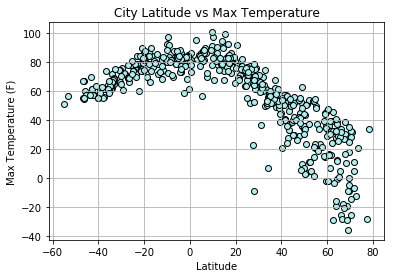

In [58]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.scatter(latitude, temp, marker="o", color="paleturquoise",edgecolor='black')
plt.show()

#### Latitude vs. Humidity Plot

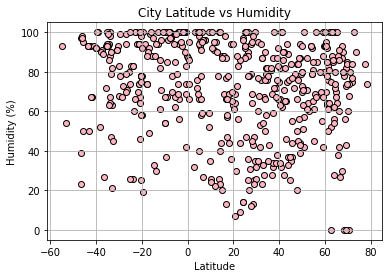

In [56]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.scatter(latitude, humid, marker="o", color="lightpink",edgecolor='black')
plt.show()


#### Latitude vs. Cloudiness Plot

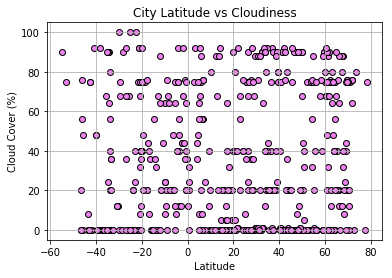

In [61]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.grid()

plt.scatter(latitude, cloud, marker="o", color="violet",edgecolor='black')
plt.show()

#### Latitude vs. Wind Speed Plot

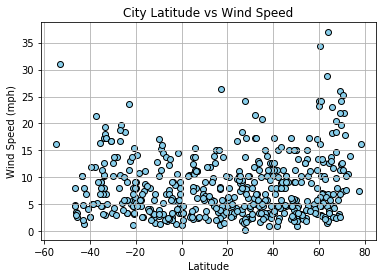

In [54]:
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.scatter(latitude, wind, marker="o", color="skyblue",edgecolor='black')
plt.show()